# Détection des limites de la route

In [53]:
%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import warnings


On cherche à détecter les bords de route sur une caméra embarquée dans un véhicule :
<img src="files/1.gif">

## Transformée de Hough

Transformation vers un espace simplifiant la détection de droites dans une image
### Représentation d'une droite
Une droite peut être représentée soit par :
\begin{align}
y = a.x + b
\end{align}
Soit par :
$$\rho = x.cos(\theta)+y.sin(\theta)$$
<img src="files/2.svg">

__Idée__ : Tester toutes les droites possibles sur l'image pour chaque pixel noir et stocker les paramètres $(\rho, \theta)$ correspondant dans une matrice.

In [50]:
def multi_droite(img_bin, theta_res=1, rho_res=1):
    theta = np.linspace(0, 180, np.ceil(180 / theta_res))

    row, col = img_bin.shape
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax2.imshow(img_bin, 'gray')
    ax2.set_title("Image d'origine")
    plt.ion()
    ax.set_title("Droites")
    fig.show()
    fig.canvas.draw()
    Dmax = np.sqrt(row ** 2 + col ** 2)
    rho = np.linspace(0, Dmax, np.ceil(Dmax / rho_res))
    cpt = 0
    for i in range(row):
        for j in range(col):
            if img_bin[i, j]:
                for k in range(len(theta)):
                    
                    rhoVal = i * np.cos(theta[k] * np.pi / 180) + j * np.sin(theta[k] * np.pi / 180)
                    
                    x = int((rhoVal - np.sin(theta[k] * np.pi / 180) * 100) / np.cos(theta[k] * np.pi / 180))

                    cdst = img_bin.copy()
                    cv2.line(cdst, (j, i), (x, 100), 255, 1)
                        
                    cpt +=1
                    if cpt == 10:
                        cpt = 0
                        ax.imshow(cdst, "gray")
                        fig.canvas.draw()
                        time.sleep(0.5)

<IPython.core.display.Javascript object>


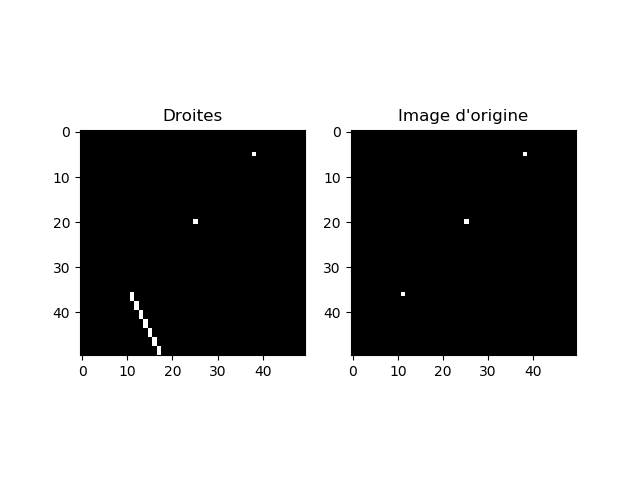

In [54]:
frame = cv2.imread("3.png", cv2.IMREAD_COLOR)

img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

img_edge = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)[1]
warnings.filterwarnings('ignore')
multi_droite(img_edge)